# Neural Networks Project

## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
tf.__version__

import cv2

%matplotlib inline
sns.set(color_codes=True)

# Part - I

## Load the Data

In [2]:
df=pd.read_csv('Part- 1,2&3 - Signal.csv')

In [3]:
df.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [4]:
print('The size of the data:', df.size)
print('No of rows in the data:', df.shape[0])
print('No of columns in the data:', df.shape[1])

The size of the data: 19188
No of rows in the data: 1599
No of columns in the data: 12


#### The shape and size of the data is printed above

## Data Preprocessing

### Replacing Non numerical values with median (if any)

In [5]:
df1=df.copy(deep=True)

In [6]:
df1 = df1.convert_objects(convert_numeric=True)

J:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [7]:
df1.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

#### No non numerical values present

In [8]:
(df1==0).all()

Parameter 1        False
Parameter 2        False
Parameter 3        False
Parameter 4        False
Parameter 5        False
Parameter 6        False
Parameter 7        False
Parameter 8        False
Parameter 9        False
Parameter 10       False
Parameter 11       False
Signal_Strength    False
dtype: bool

#### No zero values present

## Data Visualization and analysing

### Finding correlation between target variable and other variables

In [9]:
correlation_values=df1.corr()['Signal_Strength']
correlation_values.abs().sort_values(ascending=False)

Signal_Strength    1.000000
Parameter 11       0.476166
Parameter 2        0.390558
Parameter 10       0.251397
Parameter 3        0.226373
Parameter 7        0.185100
Parameter 8        0.174919
Parameter 5        0.128907
Parameter 1        0.124052
Parameter 9        0.057731
Parameter 6        0.050656
Parameter 4        0.013732
Name: Signal_Strength, dtype: float64

#### The relation between other variables and target variables is given above. It can be concluded that none of the parameters have very strong correlation(>0.5) with the target variable

<AxesSubplot:title={'center':'Correlation of Attributes'}>

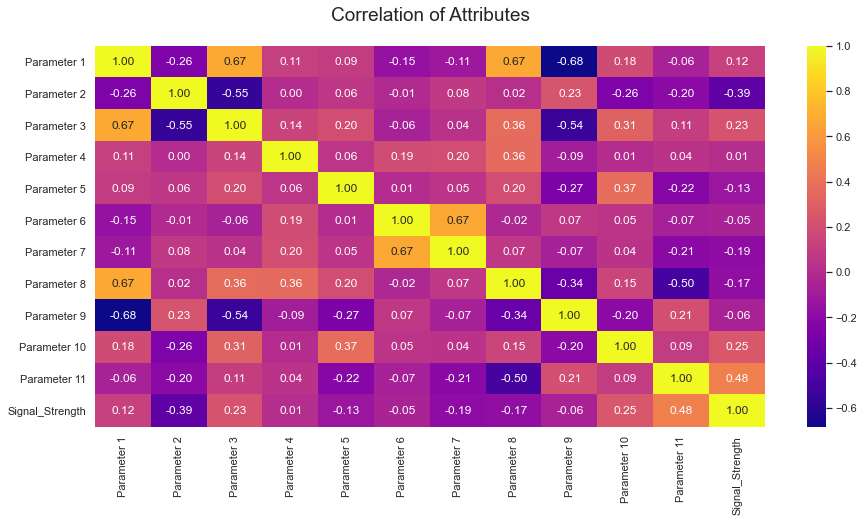

In [10]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df1.corr(), cmap='plasma',annot=True, fmt='.2f')

In [11]:
df1.nunique()

Parameter 1         96
Parameter 2        143
Parameter 3         80
Parameter 4         91
Parameter 5        153
Parameter 6         60
Parameter 7        144
Parameter 8        436
Parameter 9         89
Parameter 10        96
Parameter 11        65
Signal_Strength      6
dtype: int64

#### All the variables are continous variables except for the targer variable : Signal Strength. It is a categorical (multi-class)variable

In [12]:
df1.describe().T

count       mean        std      min      25%       50%  \
Parameter 1      1599.0   8.319637   1.741096  4.60000   7.1000   7.90000   
Parameter 2      1599.0   0.527821   0.179060  0.12000   0.3900   0.52000   
Parameter 3      1599.0   0.270976   0.194801  0.00000   0.0900   0.26000   
Parameter 4      1599.0   2.538806   1.409928  0.90000   1.9000   2.20000   
Parameter 5      1599.0   0.087467   0.047065  0.01200   0.0700   0.07900   
Parameter 6      1599.0  15.874922  10.460157  1.00000   7.0000  14.00000   
Parameter 7      1599.0  46.467792  32.895324  6.00000  22.0000  38.00000   
Parameter 8      1599.0   0.996747   0.001887  0.99007   0.9956   0.99675   
Parameter 9      1599.0   3.311113   0.154386  2.74000   3.2100   3.31000   
Parameter 10     1599.0   0.658149   0.169507  0.33000   0.5500   0.62000   
Parameter 11     1599.0  10.422983   1.065668  8.40000   9.5000  10.20000   
Signal_Strength  1599.0   5.636023   0.807569  3.00000   5.0000   6.00000   

                       75%        max  
Parameter 1       9.200000   15.90000  
Parameter 2       0.640000    1.58000  
Parameter 3       0.420000    1.00000  
Parameter 4       2.600000   15.50000  
Parameter 5       0.090000    0.61100  
Parameter 6      21.000000   72.00000  
Parameter 7      62.000000  289.00000  
Parameter 8       0.997835    1.00369  
Parameter 9       3.400000    4.01000  
Parameter 10      0.730000    2.00000  
Parameter 11     11.100000   14.90000  
Signal_Strength   6.000000    8.00000

### Five point summary

In [13]:
five_point=df1.describe().T
five_point[['min','25%','50%','75%','max']]

min      25%       50%        75%        max
Parameter 1      4.60000   7.1000   7.90000   9.200000   15.90000
Parameter 2      0.12000   0.3900   0.52000   0.640000    1.58000
Parameter 3      0.00000   0.0900   0.26000   0.420000    1.00000
Parameter 4      0.90000   1.9000   2.20000   2.600000   15.50000
Parameter 5      0.01200   0.0700   0.07900   0.090000    0.61100
Parameter 6      1.00000   7.0000  14.00000  21.000000   72.00000
Parameter 7      6.00000  22.0000  38.00000  62.000000  289.00000
Parameter 8      0.99007   0.9956   0.99675   0.997835    1.00369
Parameter 9      2.74000   3.2100   3.31000   3.400000    4.01000
Parameter 10     0.33000   0.5500   0.62000   0.730000    2.00000
Parameter 11     8.40000   9.5000  10.20000  11.100000   14.90000
Signal_Strength  3.00000   5.0000   6.00000   6.000000    8.00000

### Pairplot consisting of all the variables

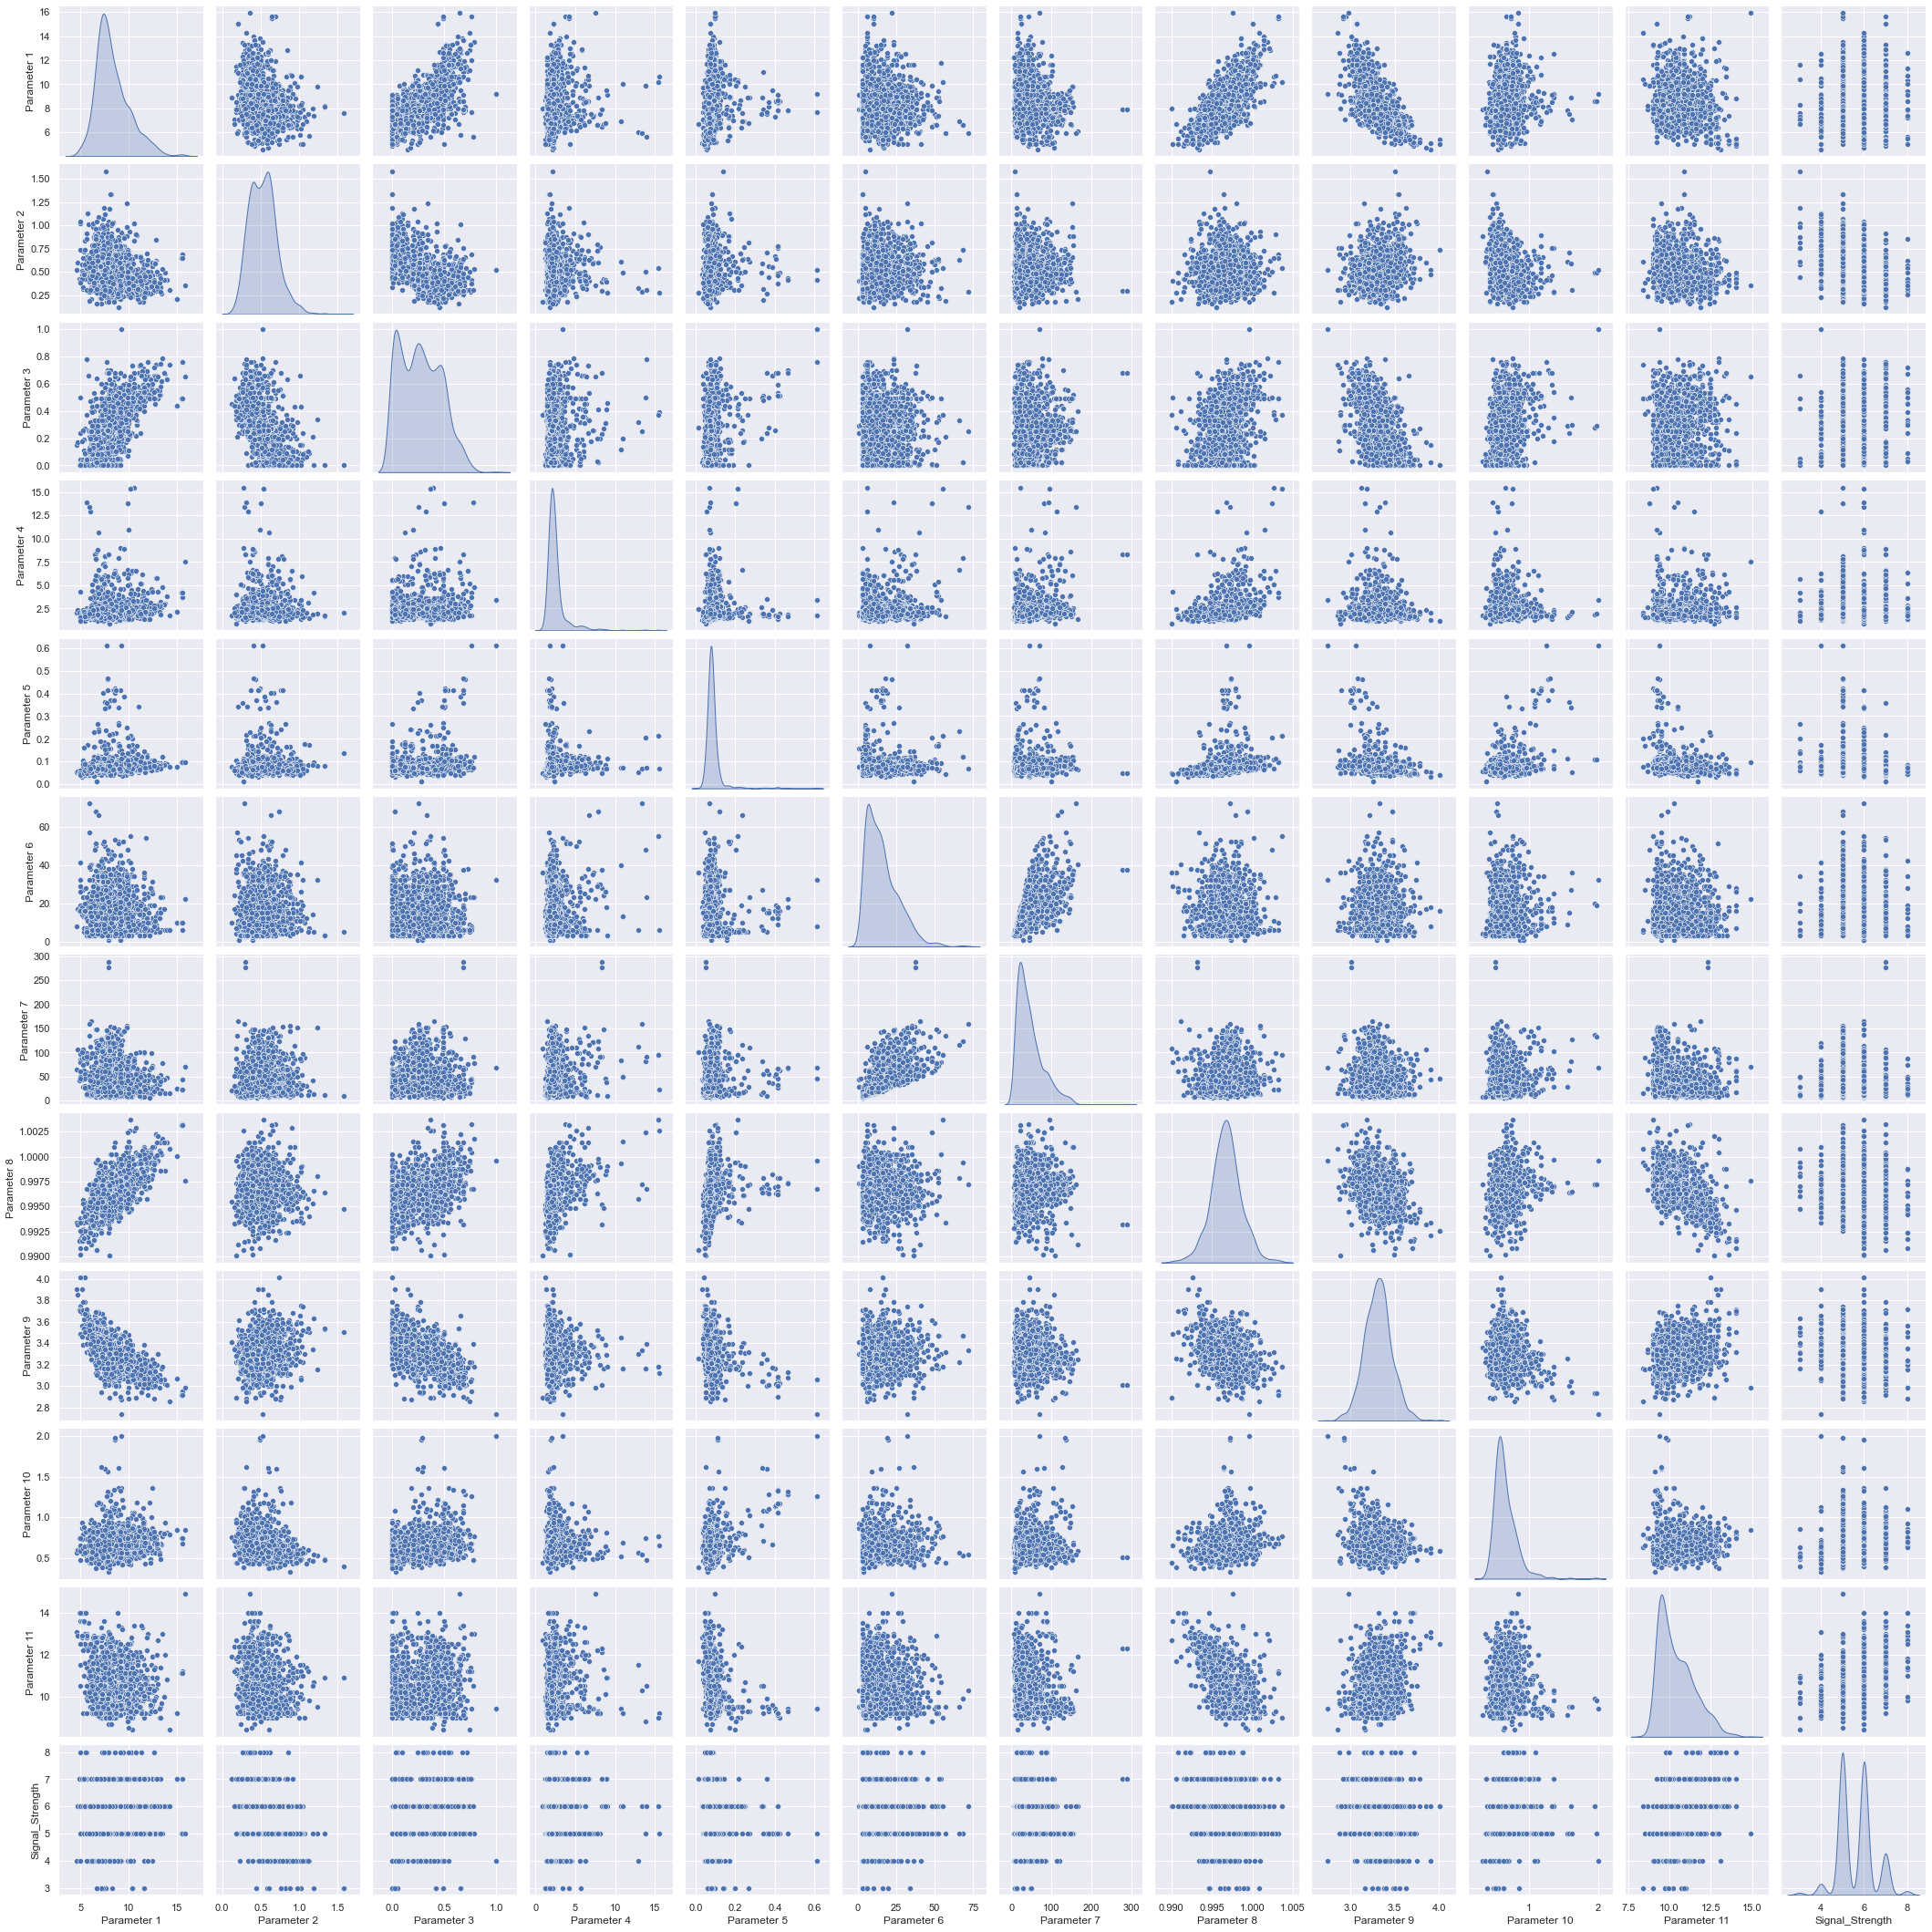

In [14]:
sns.pairplot(df1, diag_kind='kde')

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Signal_Strength', ylabel='count'>

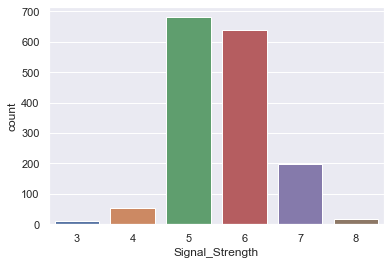

In [15]:
sns.countplot(df1['Signal_Strength'])

#### From the countplot it can be easily understood which class has the highest number of counts. 

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Signal_Strength'>

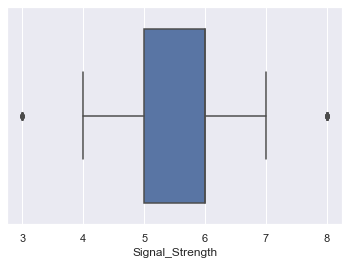

In [16]:
sns.boxplot(df1['Signal_Strength'])

### The following parameters are right skewed

J:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Parameter 4', ylabel='Density'>

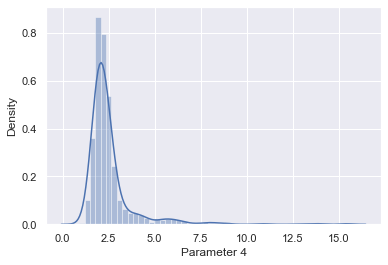

In [17]:
sns.distplot(df1['Parameter 4'])

J:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Parameter 6', ylabel='Density'>

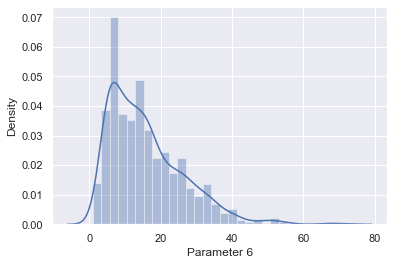

In [18]:
sns.distplot(df1['Parameter 6'])

J:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Parameter 7', ylabel='Density'>

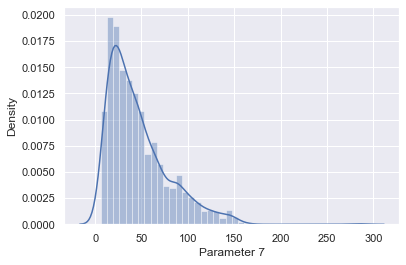

In [19]:
sns.distplot(df1['Parameter 7'])

J:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Parameter 11', ylabel='Density'>

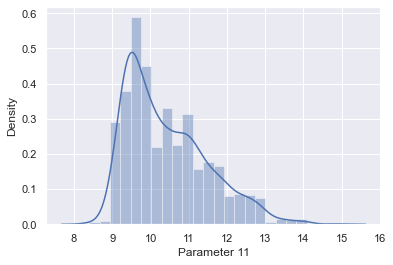

In [20]:
sns.distplot(df1['Parameter 11'])

### Parameters that have strong positive correlation with one another

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parameter 3', ylabel='Parameter 1'>

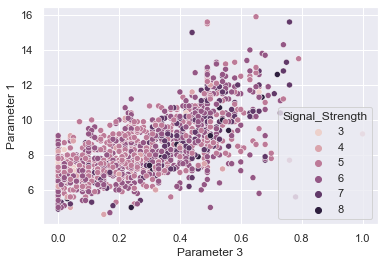

In [21]:
sns.scatterplot(df1['Parameter 3'],df1['Parameter 1'], hue=df1['Signal_Strength'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parameter 8', ylabel='Parameter 1'>

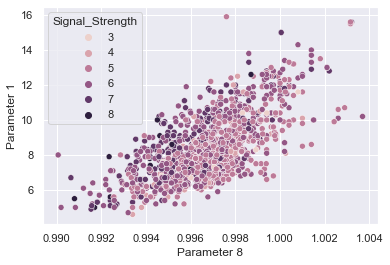

In [22]:
sns.scatterplot(df1['Parameter 8'],df1['Parameter 1'], hue=df1['Signal_Strength'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parameter 6', ylabel='Parameter 7'>

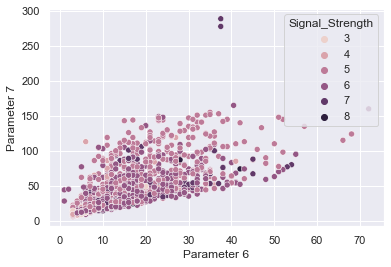

In [23]:
sns.scatterplot(df1['Parameter 6'],df1['Parameter 7'], hue=df1['Signal_Strength'])

### Parameters that have negative correlation with one another

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parameter 3', ylabel='Parameter 9'>

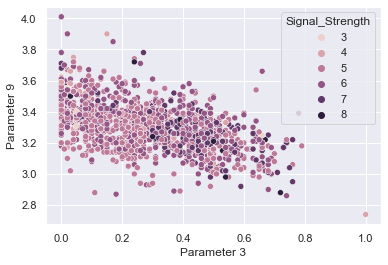

In [24]:
sns.scatterplot(df1['Parameter 3'],df1['Parameter 9'], hue=df1['Signal_Strength'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parameter 1', ylabel='Parameter 9'>

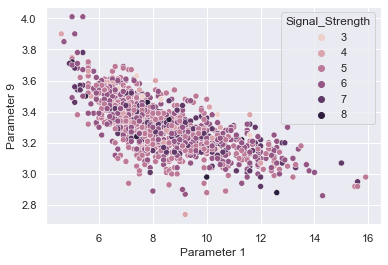

In [25]:
sns.scatterplot(df1['Parameter 1'],df1['Parameter 9'], hue=df1['Signal_Strength'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parameter 11', ylabel='Parameter 8'>

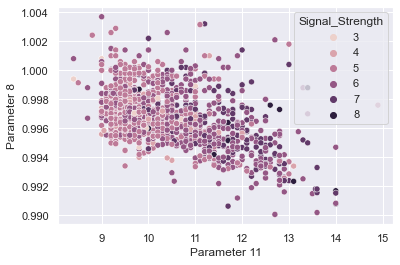

In [26]:
sns.scatterplot(df1['Parameter 11'],df1['Parameter 8'], hue=df1['Signal_Strength'])

## Regression

In [27]:
df1.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [28]:
x=df1.iloc[:,0:11]
y=df1[['Signal_Strength']]

In [29]:
print('The size of the data:', x.shape)
print('The size of the data:', y.shape)


The size of the data: (1599, 11)
The size of the data: (1599, 1)


In [30]:
x=x.to_numpy()
y=y.to_numpy()

## Creating a model and running it 

In [31]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.BatchNormalization(input_shape=(11,)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    #tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    #tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(16,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1,activation=tf.nn.relu)
                                   ])
                                    

In [32]:
model.compile(optimizer = 'adam',
              loss = 'mse'
             )

In [33]:
history=model.fit(x, y, epochs=200, validation_split=0.10)

Train on 1439 samples, validate on 160 samples
Epoch 1/200
1439/1439 [==============================] - 1s 565us/sample - loss: 14.6079 - val_loss: 108.2841
Epoch 2/200
1439/1439 [==============================] - 0s 67us/sample - loss: 2.7268 - val_loss: 15.7927
Epoch 3/200
1439/1439 [==============================] - 0s 53us/sample - loss: 1.8297 - val_loss: 3.5299
Epoch 4/200
1439/1439 [==============================] - 0s 59us/sample - loss: 1.5333 - val_loss: 2.1098
Epoch 5/200
1439/1439 [==============================] - 0s 52us/sample - loss: 1.2210 - val_loss: 1.9027
Epoch 6/200
1439/1439 [==============================] - 0s 56us/sample - loss: 1.0094 - val_loss: 1.3412
Epoch 7/200
1439/1439 [==============================] - 0s 52us/sample - loss: 0.8497 - val_loss: 1.3688
Epoch 8/200
1439/1439 [==============================] - 0s 55us/sample - loss: 0.6835 - val_loss: 1.2992
Epoch 9/200
1439/1439 [==============================] - 0s 54us/sample - loss: 0.6355 - val_loss: 1

### Plotting the loss vs epoch graph

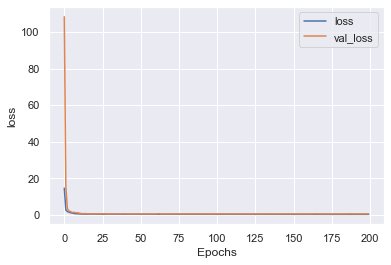

In [34]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


plot_graphs(history, 'loss')

### Sample test data

In [37]:
test_x = np.reshape([10.8, 0.59,0, 3.5, 0.05, 18,108, 0.9, 3.4, 0.5,9.1],(-1, 11))

In [38]:
test_y = model.predict(test_x)

print(test_y)

[[4.9586906]]


### Saving the model

In [39]:
model.save("Regression_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Regression_model\assets


# Part - II

## Classification model

In [40]:
x=df1.iloc[:,0:11]
y=df1[['Signal_Strength']]



In [41]:
x.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  
0           9.4  
1           9.8  
2           9.8  
3           9.8  
4           9.4

In [42]:
y.head()

Signal_Strength
0                5
1                5
2                5
3                6
4                5

In [43]:
x=x.to_numpy()
y=y.to_numpy()

### One hot encoding the target variable 

In [44]:
y[3]

array([6], dtype=int64)

In [45]:
y_new=tf.keras.utils.to_categorical(y, num_classes=10)

In [46]:
y_new[3]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### Creating a model and running it

In [47]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.BatchNormalization(input_shape=(11,)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                   ])

In [48]:
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

#### The TensorFlow documentation clearly states that "labels vector must provide a single specific index for the true class for each row of logits". So your labels vector must include only class-indices like 0,1,2 and not their respective one-hot-encodings like [1,0,0], [0,1,0], [0,0,1]. Hence not using the one hot encoding


In [49]:
history=model.fit(x,y, epochs=500,validation_split=0.10,batch_size=1000, verbose= 1)

Train on 1439 samples, validate on 160 samples
Epoch 1/500
1439/1439 [==============================] - 1s 369us/sample - loss: 2.4815 - accuracy: 0.0744 - val_loss: 4.8145 - val_accuracy: 0.0125
Epoch 2/500
1439/1439 [==============================] - 0s 11us/sample - loss: 2.4537 - accuracy: 0.0973 - val_loss: 4.3972 - val_accuracy: 0.0375
Epoch 3/500
1439/1439 [==============================] - 0s 13us/sample - loss: 2.4288 - accuracy: 0.1174 - val_loss: 4.1551 - val_accuracy: 0.0562
Epoch 4/500
1439/1439 [==============================] - 0s 12us/sample - loss: 2.4057 - accuracy: 0.1480 - val_loss: 3.9647 - val_accuracy: 0.0688
Epoch 5/500
1439/1439 [==============================] - 0s 12us/sample - loss: 2.3829 - accuracy: 0.1821 - val_loss: 3.8068 - val_accuracy: 0.0750
Epoch 6/500
1439/1439 [==============================] - 0s 13us/sample - loss: 2.3624 - accuracy: 0.2175 - val_loss: 3.6712 - val_accuracy: 0.0750
Epoch 7/500
1439/1439 [==============================] - 0s 13us

### Plotting Accuracy vs epoch and Loss vs epoch graph

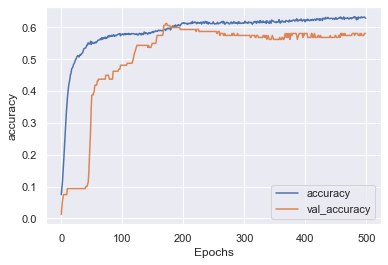

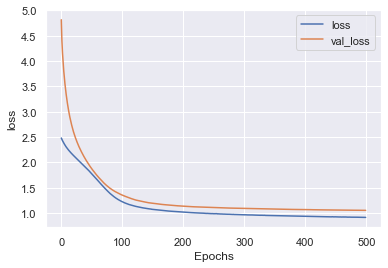

In [50]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### Saving the model

In [53]:
model.save("Classification_model")

INFO:tensorflow:Assets written to: Classification_model\assets


### Based on the results from both the model, I would recommend using classification model for predicting the signal strength problem

# Part- IV

## Loading the dataset

In [54]:
import h5py

In [55]:
h5f = h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [56]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [57]:
h5f.close()

## Data Preprocessing and visualizing

In [58]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)


6   7   4   4   0   3   0   7   3   1   
0   1   3   1   1   0   0   8   4   6   
5   7   9   1   0   3   0   7   2   1   
1   0   2   9   0   2   5   1   3   2   
7   9   8   4   9   4   5   9   3   4   
0   5   5   8   3   6   6   0   0   6   
8   8   3   1   4   7   0   2   9   4   
8   7   3   9   4   4   3   3   4   4   
8   6   8   7   4   0   4   4   4   1   
4   2   7   4   2   9   1   9   1   0   


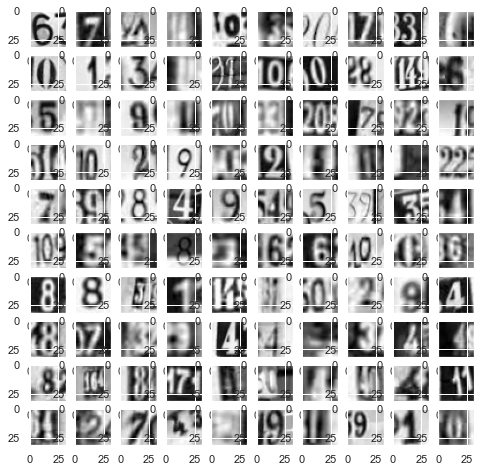

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

columns=10
rows=10

fig=plt.figure(figsize=(8, 8))

for i in range(1,columns*rows+1):
  img=X_train[i]
  fig.add_subplot(rows,columns,i)
  print(y_train[i],end='   ')
  if i % columns == 0:
    print ("")
  plt.imshow(img,cmap='gray')

plt.show()

### Resizing the image

In [60]:

# Here we are resizing it to 28X28 (same input size as MNIST)
X_train_resized=np.zeros((X_train.shape[0],28,28))
for i in range(X_train.shape[0]):
  #using cv2.resize to resize each train example to 28X28 size using Cubic interpolation
  X_train_resized[i,:,:]=cv2.resize(X_train[i],dsize=(28,28),interpolation=cv2.INTER_CUBIC)

X_test_resized = np.zeros((X_test.shape[0], 28, 28))
for i in range(X_test.shape[0]):
  #using cv2.resize to resize each test example to 28X28 size using Cubic interpolation
  X_test_resized[i,:,:] = cv2.resize(X_test[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
  

del(X_train, X_test)

In [61]:
X_train = X_train_resized.reshape(X_train_resized.shape[0], 28, 28, 1)
X_test = X_test_resized.reshape(X_test_resized.shape[0], 28, 28, 1)

In [62]:
del(X_train_resized, X_test_resized)

### Normalizing the image

In [63]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [64]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])


X_train shape: (42000, 28, 28, 1)
X_test shape: (18000, 28, 28, 1)
Images in X_train: 42000
Images in X_test: 18000


Label:  7
label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


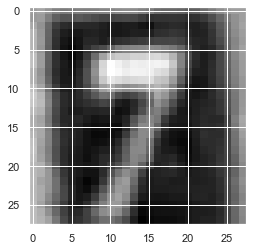

In [65]:
print("Label: ", y_train[2])
#y_new=tf.keras.utils.to_categorical(y_train, num_classes=10)
print("label:", y_new[2])
plt.imshow(X_train[2].reshape(28,28), cmap='gray')

## Creating a model and running it 

In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(64, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-9
    tf.keras.layers.Dense(10, activation='softmax')
])

In [68]:
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [69]:
history=model.fit(X_train,y_train,epochs=30,batch_size=64,validation_data=(X_test,y_test))

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 4s 86us/sample - loss: 2.1372 - accuracy: 0.2061 - val_loss: 1.5981 - val_accuracy: 0.4676
Epoch 2/30
42000/42000 [==============================] - 3s 72us/sample - loss: 1.4016 - accuracy: 0.5447 - val_loss: 1.2369 - val_accuracy: 0.6121
Epoch 3/30
42000/42000 [==============================] - 3s 74us/sample - loss: 1.1798 - accuracy: 0.6324 - val_loss: 1.1231 - val_accuracy: 0.6507
Epoch 4/30
42000/42000 [==============================] - 3s 74us/sample - loss: 1.0850 - accuracy: 0.6654 - val_loss: 1.0667 - val_accuracy: 0.6613
Epoch 5/30
42000/42000 [==============================] - 3s 74us/sample - loss: 1.0008 - accuracy: 0.6912 - val_loss: 0.9543 - val_accuracy: 0.7091
Epoch 6/30
42000/42000 [==============================] - 3s 77us/sample - loss: 0.9527 - accuracy: 0.7082 - val_loss: 0.9918 - val_accuracy: 0.6921
Epoch 7/30
42000/42000 [==============================] 

## Plotting the graphs

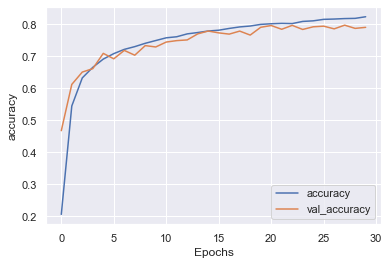

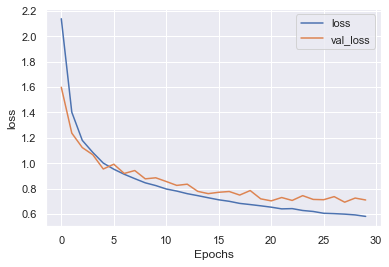

In [70]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### Saving the model

In [71]:
model.save("SVHN_model")

INFO:tensorflow:Assets written to: SVHN_model\assets


### Train accuracy : 82%
### Test Accuracy : 79%

# Part- III

### Using tkinter to create a simple GUI 

In [72]:
from tkinter import *
import psutil
import platform
from datetime import datetime
import os
from tkinter import messagebox

### Code the necessary functions

In [73]:
def read_data():
    df=pd.read_csv('Part- 1,2&3 - Signal.csv')
    df1 = df.convert_objects(convert_numeric=True)
    x=df1.iloc[:,0:11]
    y=df1[['Signal_Strength']]
    
    l6=Label(root,text='Data loading completed',fg='light blue',bg='black' )
    l6.grid(row=8,column= 50)
    return x,y


In [74]:
def regression():
    x,y=read_data()
    x.head()
    y.head()
    x=x.to_numpy()
    y=y.to_numpy()
    model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.BatchNormalization(input_shape=(11,)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    #tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    #tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(16,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1,activation=tf.nn.relu)
                                   ])
    model.compile(optimizer = 'adam',
              loss = 'mse')
    history=model.fit(x, y, epochs=200, validation_split=0.10)
    
    model.save("Regression_model")
    a=history.history['loss']
    a=a[199]
    b=history.history['val_loss']
    b=b[199]
    
    l7=Label(root,text='Train_loss:'+' '+str(a),fg='light blue',bg='black' )
    l8=Label(root,text='Val_Loss:'+' '+str(b),fg='light blue',bg='black' )
    l9=Label(root,text='Data Saved',fg='light blue',bg='black')
    l7.grid(row=14,column= 50)
    l8.grid(row=16,column= 50)
    l9.grid(row=18,column=50)


             

In [75]:
def classification():
    x,y=read_data()
    x=x.to_numpy()
    y=y.to_numpy()
    
    model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.BatchNormalization(input_shape=(11,)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                   ])
    model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")
    history=model.fit(x, y, epochs=500, validation_split=0.10, batch_size=1000, verbose= 1)
    
    model.save("Classification_model")
    
    a=history.history['loss']
    a=a[499]
    b=history.history['val_loss']
    b=b[499]
    c=history.history['accuracy']
    c=c[499]
    d=history.history['val_accuracy']
    d=d[499]
    
    l9=Label(root,text='Train_loss:'+' '+str(a),fg='light blue',bg='black' )
    l10=Label(root,text='Val_Loss:'+' '+str(b),fg='light blue',bg='black' )
    l9.grid(row=24,column= 50)
    l10.grid(row=26,column= 50)
    
    l11=Label(root,text='Train_loss:'+' '+str(c),fg='light blue',bg='black' )
    l12=Label(root,text='Val_Loss:'+' '+str(d),fg='light blue',bg='black' )
    l11.grid(row=28,column= 50)
    l12.grid(row=30,column= 50)
    
    l13=Label(root,text='Model Saved',fg='light blue',bg='black')
    l12.grid(row=32,column=50)
    
    

### Create the GUI and feed in the functions

In [77]:
root=Tk()
root.configure(background='light blue')
root.title("System Configuration")
root.geometry("1000x1000")

headlabel = Label(root, text = 'System Information', fg = 'light blue', bg = "black" ,justify="center",height="2")
headlabel.grid(row=2,column=50)

label1=Label(root,text="",bg='light blue')
label113=Label(root,text="Data name:Part- 1,2&3 - Signal.csv ", fg = 'light blue', bg = "black" ,justify="center",height="2")
label2=Label(root,text="" ,bg='light blue')
label3=Label(root,text="" ,bg='light blue')


label1.grid(row=3,column=1)
label113.grid(row=4,column=50)
label2.grid(row=10,column=2)
label3.grid(row=20,column=2)

button1 = Button(root, text = "Read Data", bg = "white", 
					fg = "black", command = read_data) 

button2 = Button(root, text = "Run regression", bg = "white", 
					fg = "black", command = regression)

button3 = Button(root, text = "Run classification", bg = "white", 
					fg = "black", command = classification) 

button1.grid(row = 6, column = 2)
button2.grid(row = 12, column = 2)
button3.grid(row = 22, column = 2)

root.mainloop()